# Asian Restaurants

In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("../input/asian-restaurants/asia.csv")
data

case        restaurant  price  gReviews  gRating  ddReviews  ddRating  \
0       2          Sun Shui      2       324      4.5          0       0.0   
1       4    Chen Yang Li B      2       468      4.2          0       0.0   
2       6       Dragon Star      2       126      4.2          0       0.0   
3      11  Siam Orchid Thai      2       417      4.2          0       0.0   
4      12    Splendid Sushi      2       135      4.9          0       0.0   
..    ...               ...    ...       ...      ...        ...       ...   
98     85        Wok N Roll      2       107      4.3       2900       4.6   
99     61    Thousand Crane      2       176      3.5       3700       4.6   
100    50   Kisaki Japanese      2       590      4.4       3800       4.7   
101    41  Cheng Du Kitchen      2        31      4.5       5900       4.7   
102   103       Jade Garden      2        96      4.2          0       0.0   

     ddFee  yReviews  yRating   latitude  longitude        town  
0     0.00       154      4.0  42.919826 -71.461006     Bedford  
1     0.00        83      3.0  43.170056 -71.535558         Bow  
2     0.00        28      3.5  43.200392 -71.532658     Concord  
3     0.00        80      3.5  43.204658 -71.535469     Concord  
4     0.00         8      4.5  43.204005 -71.536732     Concord  
..     ...       ...      ...        ...        ...         ...  
98    0.99        27      4.0  42.753885 -71.462696      Nashua  
99    1.99        99      3.0  42.992559 -71.463695  Manchester  
100   1.99       112      4.0  42.987353 -71.462839  Manchester  
101   3.99        41      3.5  43.016959 -71.449888  Manchester  
102   0.00        26      4.0  43.048281 -71.434783    Hooksett  

[103 rows x 13 columns]

# I have separated the numerical columns from the whole dataframes

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = data.select_dtypes(include=numerics)
numeric_df

case  price  gReviews  gRating  ddReviews  ddRating  ddFee  yReviews  \
0       2      2       324      4.5          0       0.0   0.00       154   
1       4      2       468      4.2          0       0.0   0.00        83   
2       6      2       126      4.2          0       0.0   0.00        28   
3      11      2       417      4.2          0       0.0   0.00        80   
4      12      2       135      4.9          0       0.0   0.00         8   
..    ...    ...       ...      ...        ...       ...    ...       ...   
98     85      2       107      4.3       2900       4.6   0.99        27   
99     61      2       176      3.5       3700       4.6   1.99        99   
100    50      2       590      4.4       3800       4.7   1.99       112   
101    41      2        31      4.5       5900       4.7   3.99        41   
102   103      2        96      4.2          0       0.0   0.00        26   

     yRating   latitude  longitude  
0        4.0  42.919826 -71.461006  
1        3.0  43.170056 -71.535558  
2        3.5  43.200392 -71.532658  
3        3.5  43.204658 -71.535469  
4        4.5  43.204005 -71.536732  
..       ...        ...        ...  
98       4.0  42.753885 -71.462696  
99       3.0  42.992559 -71.463695  
100      4.0  42.987353 -71.462839  
101      3.5  43.016959 -71.449888  
102      4.0  43.048281 -71.434783  

[103 rows x 11 columns]

# The boxplots for all the numerical columns are plotted

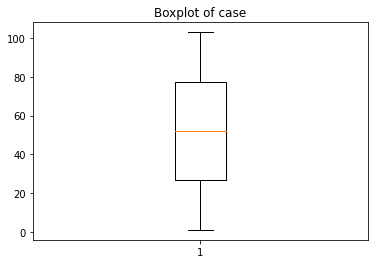

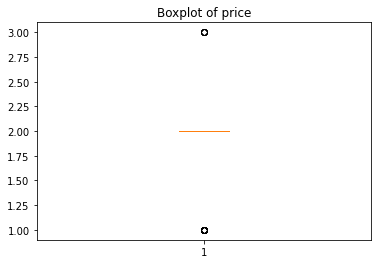

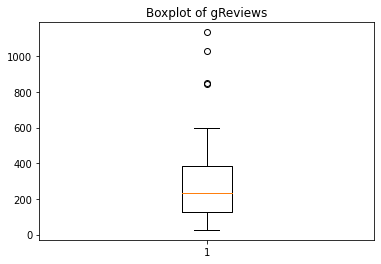

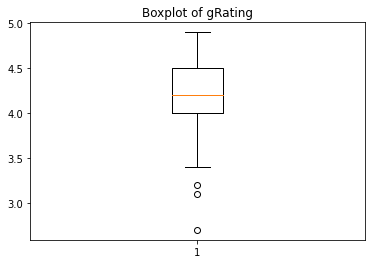

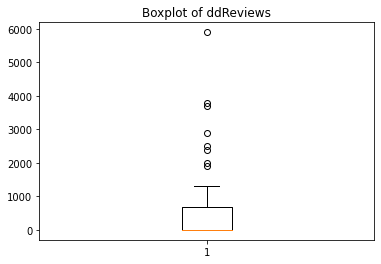

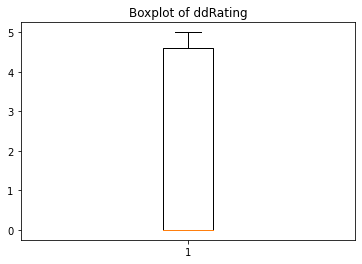

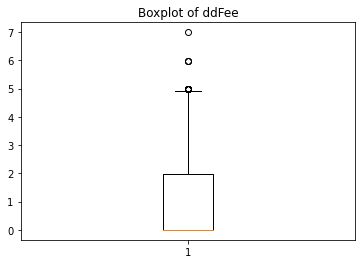

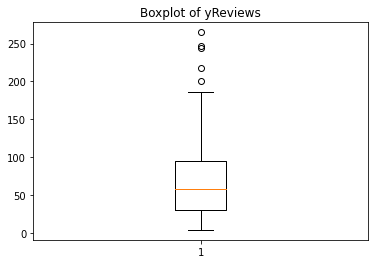

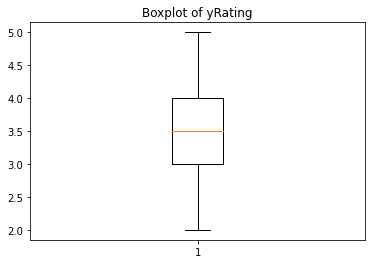

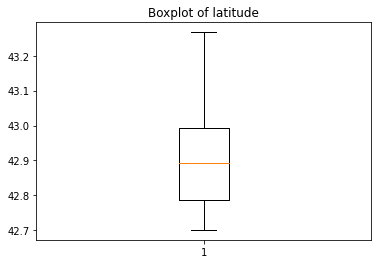

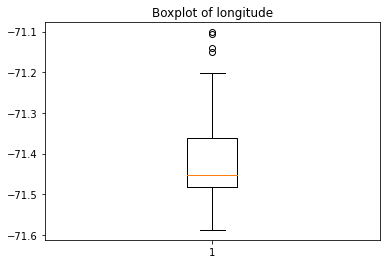

In [4]:
import matplotlib.pyplot as plt

for col in numeric_df.columns:
    plt.title('Boxplot of {}'.format(col))
    plt.boxplot(data[col])
    plt.show()
    

# The initial distributions are plotted for all the numerical columns

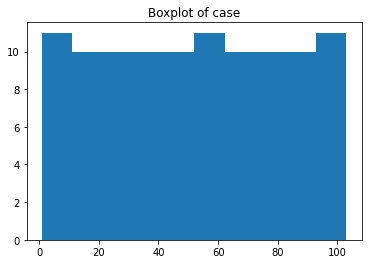

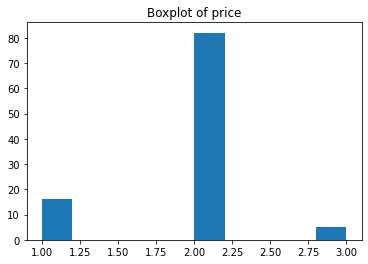

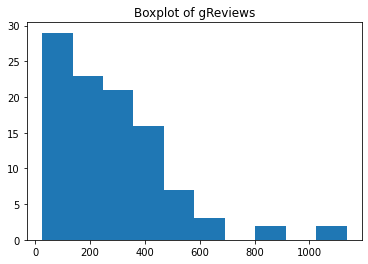

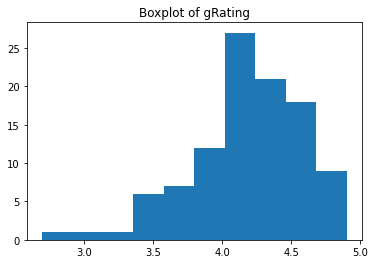

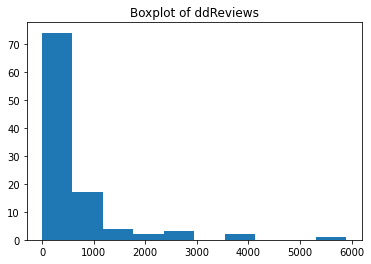

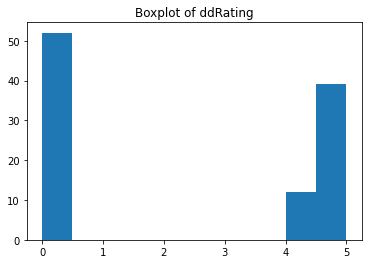

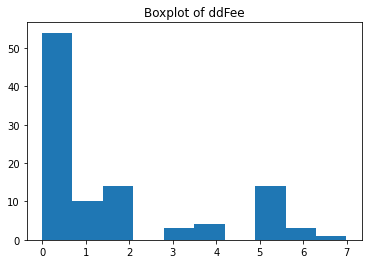

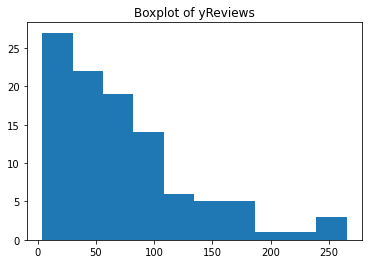

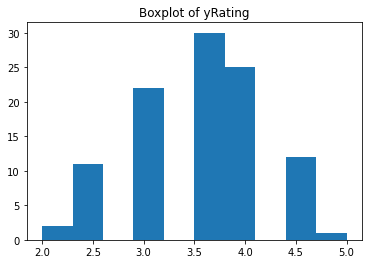

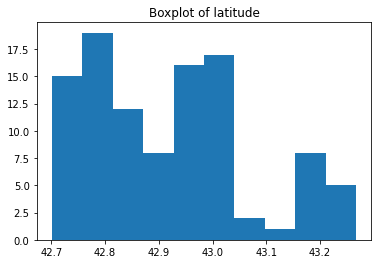

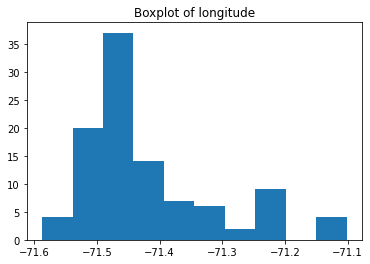

In [5]:
for col in numeric_df.columns:
    plt.title('Boxplot of {}'.format(col))
    plt.hist(data[col])
    plt.show()

# Checking to see which town has the most ratings

In [6]:
pivot = data.pivot_table(index=['town'], values=['yRating'], aggfunc='count')
print (pivot)

                yRating
town                   
Bedford               3
Bow                   1
Concord              10
Derry                 6
East Hampstead        1
Epsom                 1
Hampstead             1
Hooksett              2
Hudson                4
Londonderry           5
Manchester           31
Merrimack             5
Nashua               18
Pembroke              1
Penacook              1
Plaistow              2
Salem                 9
Windham               2


# Basemap for plotting the map

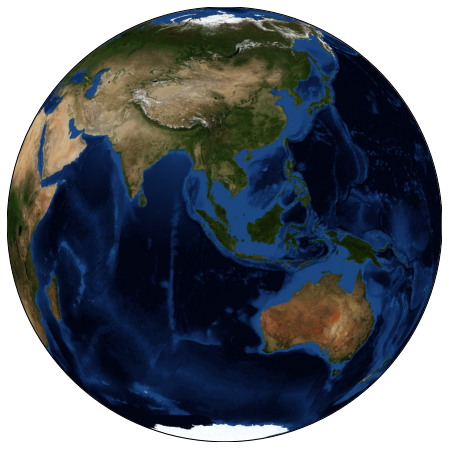

In [7]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=1.35, lon_0=103)
m.bluemarble(scale=0.5);

# Getting the unique dataframe of all the towns

In [8]:
town_uni = data.drop_duplicates(subset = ["town"])
town_uni.reset_index(inplace=True)
town_uni

index  case          restaurant  price  gReviews  gRating  ddReviews  \
0       0     2            Sun Shui      2       324      4.5          0   
1       1     4      Chen Yang Li B      2       468      4.2          0   
2       2     6         Dragon Star      2       126      4.2          0   
3       7    15        China Garden      1       144      3.9          0   
4       9    21         Golden Leaf      2        78      3.8          0   
5      10    22        Happy Family      2       291      4.3          0   
6      11    23               Osaka      2       192      4.0          0   
7      12    24        Asian Breeze      2       386      4.4          0   
8      13    25      Dynamite Sushi      2       249      4.4          0   
9      14    30   Bangkok Thai Food      2       192      4.7          0   
10     17    34    Aloha Restaurant      2       481      4.2          0   
11     33    67       Hana Japanese      3        82      4.8          0   
12     36    73       Lilac Blossom      2       591      4.3          0   
13     41    88               Mei's      2       116      3.7          0   
14     42    89         Asian Taste      1        76      4.4          0   
15     43    90          Chang Long      1        93      4.1          0   
16     45    92        Lucky Dragon      1       231      3.9          0   
17     50   102  Li's Asian Gourmet      2        40      4.2          0   

    ddRating  ddFee  yReviews  yRating   latitude  longitude            town  
0        0.0    0.0       154      4.0  42.919826 -71.461006         Bedford  
1        0.0    0.0        83      3.0  43.170056 -71.535558             Bow  
2        0.0    0.0        28      3.5  43.200392 -71.532658         Concord  
3        0.0    0.0        74      3.5  42.898300 -71.335473           Derry  
4        0.0    0.0        21      3.0  42.891259 -71.139307  East Hampstead  
5        0.0    0.0        23      3.0  43.230217 -71.361415           Epsom  
6        0.0    0.0        50      3.0  42.887691 -71.149027       Hampstead  
7        0.0    0.0        87      4.0  43.053215 -71.442233        Hooksett  
8        0.0    0.0       150      4.0  42.759067 -71.430858          Hudson  
9        0.0    0.0       111      4.5  42.866402 -71.349207     Londonderry  
10       0.0    0.0        85      3.0  42.986402 -71.426531      Manchester  
11       0.0    0.0        39      4.5  42.837345 -71.499091       Merrimack  
12       0.0    0.0       103      3.5  42.707436 -71.467752          Nashua  
13       0.0    0.0        46      3.5  43.130859 -71.452656        Pembroke  
14       0.0    0.0        21      4.0  43.267225 -71.587472        Penacook  
15       0.0    0.0        51      4.0  42.849543 -71.104977        Plaistow  
16       0.0    0.0        37      2.5  42.754452 -71.207800           Salem  
17       0.0    0.0        25      2.5  42.792473 -71.304759         Windham

# Install the full package
# conda install -c conda-forge basemap-data-hires

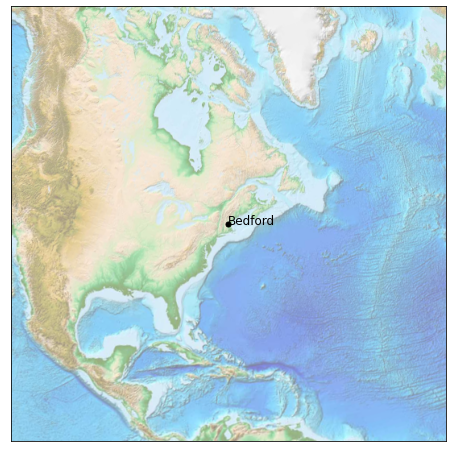

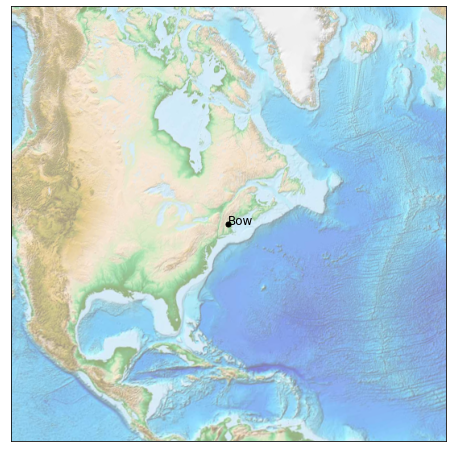

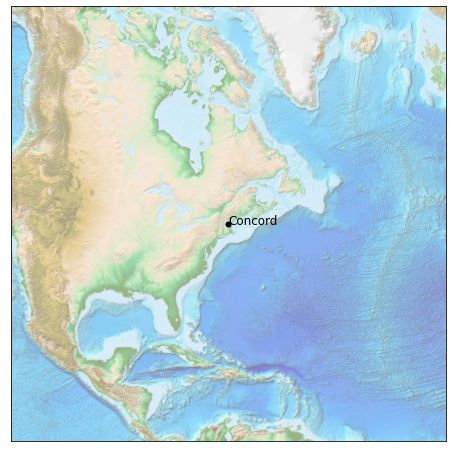

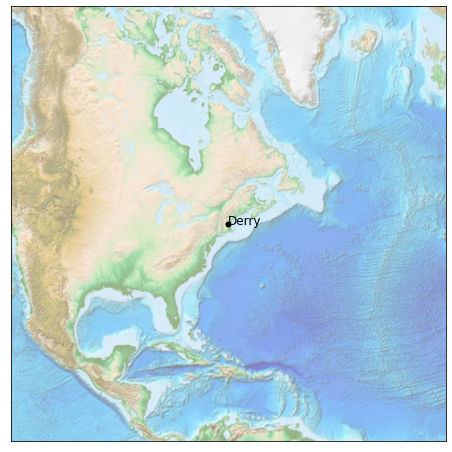

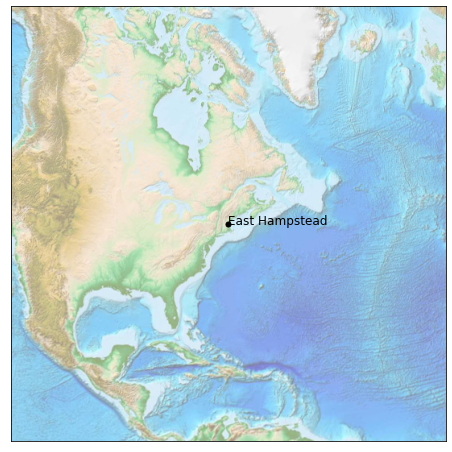

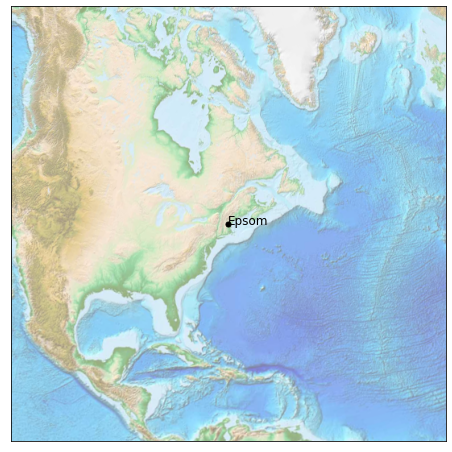

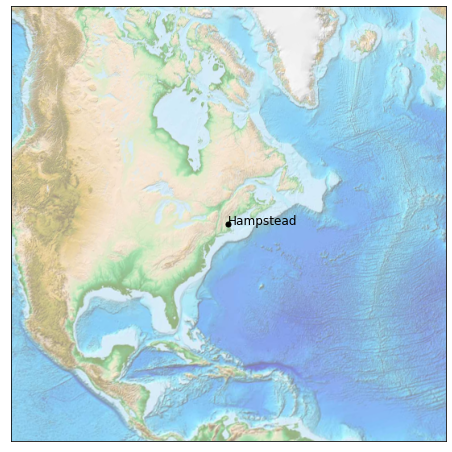

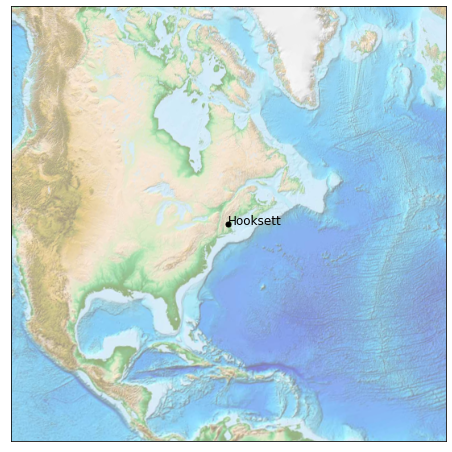

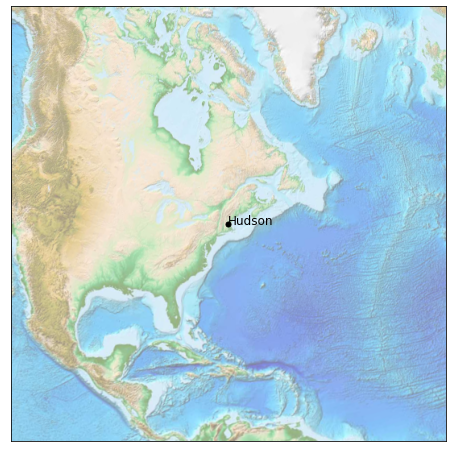

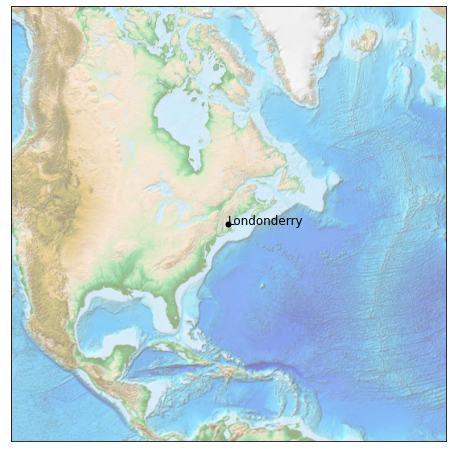

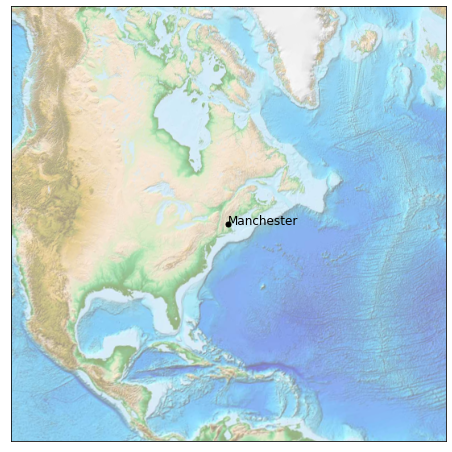

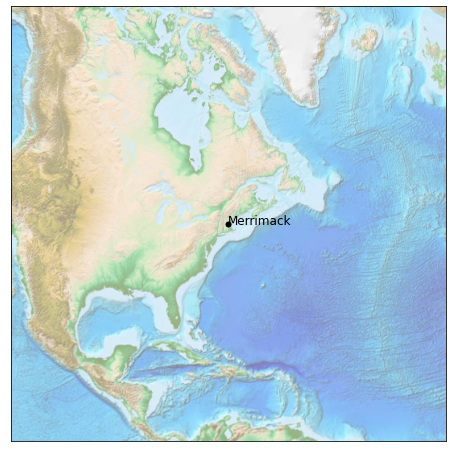

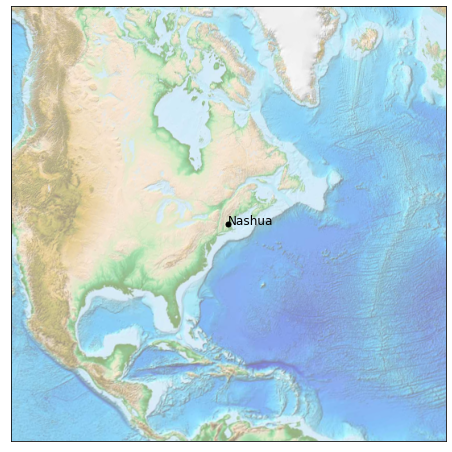

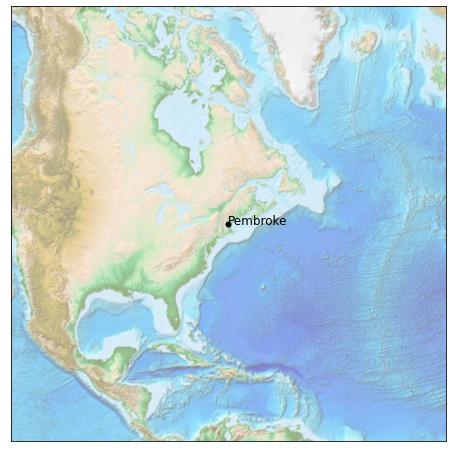

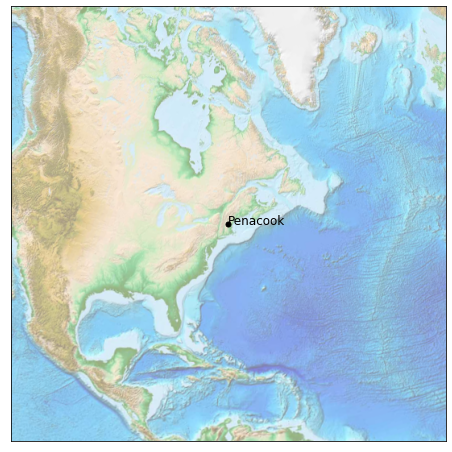

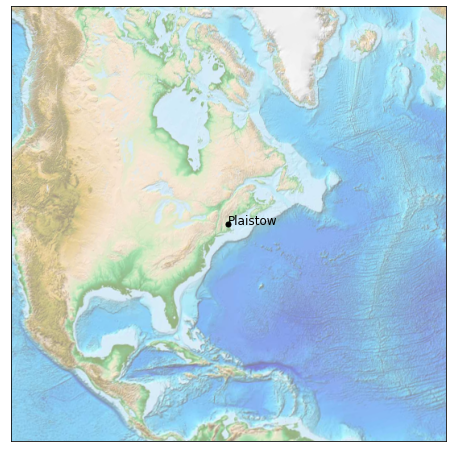

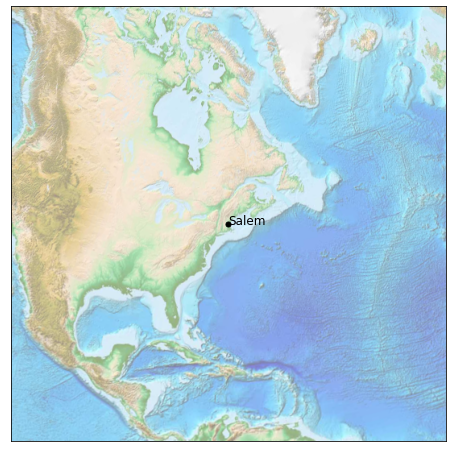

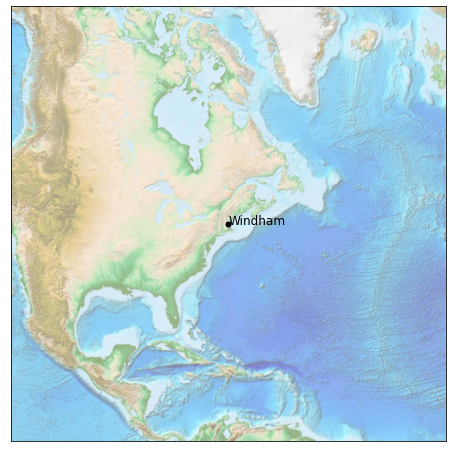

In [9]:
for i,j in enumerate(town_uni['town']):
    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution=None,
                width=8E6, height=8E6, 
                lat_0=town_uni['latitude'][i], lon_0=town_uni['longitude'][i])
    m.etopo(scale=0.5, alpha=0.5)

    x, y = m(town_uni['longitude'][i], town_uni['latitude'][i])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, town_uni['town'][i], fontsize=12);
    plt.show()

# Plotting a zoomed map

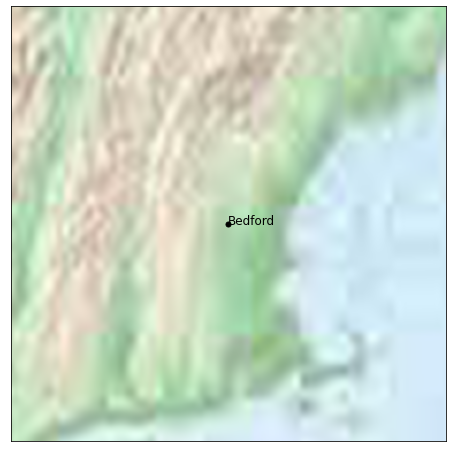

In [10]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=4E5, height=4E5, 
            lat_0=data['latitude'][0], lon_0=data['longitude'][0])
m.etopo(scale=7, alpha=0.5)

x, y = m(data['longitude'][0], data['latitude'][0])
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, data['town'][0], fontsize=12);
